In [ ]:
# Ön İşleme (Pre-processing) Aşamaları



In [63]:
import nltk
import numpy
import pandas as pd
import string
import csv
from gensim.models import Word2Vec
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer

In [64]:
df = pd.read_csv("C:/Users/melek/Downloads/large_student_answer_dataset.csv")
print(df)


                                                Question  \
0          Explain how gravity affects objects on Earth.   
1      Describe the function of the heart in the huma...   
2                            Why is recycling important?   
3          Explain how gravity affects objects on Earth.   
4                            Why is recycling important?   
...                                                  ...   
83328  Describe the function of the heart in the huma...   
83329      Explain how gravity affects objects on Earth.   
83330  Describe the function of the heart in the huma...   
83331      Explain how gravity affects objects on Earth.   
83332                What is the process of evaporation?   

                                              Key_Answer  \
0      Gravity pulls objects toward the center of the...   
1      The heart pumps blood throughout the body, sup...   
2      Recycling reduces waste, conserves resources, ...   
3      Gravity pulls objects toward the

In [65]:
#Stop word removal(gereksiz/sık kullanılan kelimelerin çıkarılması) işlemi Yapıldı
nltk.download("stopwords")

stop_words = set(stopwords.words('turkish'))

stop_words_list = list(stop_words)

print(" İlk 50 Türkçe stopword:")
print(stop_words_list[:50])


 İlk 50 Türkçe stopword:
['defa', 'gibi', 'tüm', 'sanki', 'biri', 'bazı', 'kez', 'çok', 'kim', 'hepsi', 'ne', 'bu', 'hiç', 'niye', 'çünkü', 'ile', 'şey', 'acaba', 'biz', 'şu', 'ise', 'diye', 'mü', 'siz', 'az', 'niçin', 'nereye', 'de', 'birşey', 'o', 'ama', 'birkaç', 'da', 'mu', 'nerde', 'hep', 'nerede', 'nasıl', 'en', 'hem', 'eğer', 'daha', 'veya', 'belki', 'aslında', 'her', 'ya', 've', 'mı', 'ki']


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\melek\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [66]:
#Tokenization (noktalama işaretlerinin kaldırılması dâhil) Yapıldı
# Gerekli NLTK paketi indiriliyor
nltk.download('punkt')

# Noktalama karakterlerini kaldırmak için çeviri tablosu
translator = str.maketrans('', '', string.punctuation)

# Her tweeti cümlelere ayır ve noktalama işaretlerini kaldır
def split_and_clean_sentences(text):
    sentences = sent_tokenize(str(text))  # Cümlelere ayırıyor
    cleaned = [s.translate(translator) for s in sentences]  # Noktalamayı kaldırıyor
    return cleaned

df['sentences'] = df["Student_Answer"].apply(split_and_clean_sentences)

# İlk 20 satırın cümlelerini yazdır
print(df['sentences'].head(20))


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\melek\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0     [Gravity keeps us on the ground and makes thin...
1     [It moves blood around so the body gets what i...
2     [It helps the Earth and stops trash from pilin...
3     [Gravity keeps us on the ground and makes thin...
4     [It helps the Earth and stops trash from pilin...
5     [It moves blood around so the body gets what i...
6     [It moves blood around so the body gets what i...
7     [It helps the Earth and stops trash from pilin...
8     [It moves blood around so the body gets what i...
9     [It moves blood around so the body gets what i...
10    [Water disappears when it gets hot,  elaborati...
11    [It helps the Earth and stops trash from pilin...
12    [Gravity keeps us on the ground and makes thin...
13    [Gravity keeps us on the ground and makes thin...
14    [It helps the Earth and stops trash from pilin...
15    [Gravity keeps us on the ground and makes thin...
16    [Seasons change because the weather changes du...
17    [Gravity keeps us on the ground and makes 

In [67]:
#Lowercasing (kelimelerin küçük harfe dönüştürülmesi) Yapıldı

# Gerekli NLTK verileri indiriliyor
nltk.download('punkt')
nltk.download('stopwords')

# Türkçe stopword'ler
stop_words = set(stopwords.words('turkish'))

# tek bir listede cümlelere böl
all_sentences = []
for tweet in df['Student_Answer']:
    if pd.notna(tweet):  # NaN olmayanları kontrol et
        tweet_sentences = sent_tokenize(str(tweet))
        all_sentences.extend(tweet_sentences)

# Cümleleri kelimelere ayır ve temizle
filtered_sentences = []
for sentence in all_sentences:
    tokens = word_tokenize(sentence)
    filtered_tokens = []
    for token in tokens:
        if token.isalpha():  # Sadece harflerden oluşuyorsa
            token_lower = token.lower()
            if token_lower not in stop_words:
                filtered_tokens.append(token_lower)
    filtered_sentences.append(filtered_tokens)

# İlk 10 temizlenmiş cümleyi yazdır
print(filtered_sentences[:10])



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\melek\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\melek\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[['gravity', 'keeps', 'us', 'on', 'the', 'ground', 'and', 'makes', 'things', 'fall'], ['elaboration'], ['it', 'moves', 'blood', 'around', 'so', 'the', 'body', 'gets', 'what', 'it', 'needs'], ['elaboration'], ['it', 'helps', 'the', 'earth', 'and', 'stops', 'trash', 'from', 'piling', 'up'], ['elaboration'], ['gravity', 'keeps', 'us', 'on', 'the', 'ground', 'and', 'makes', 'things', 'fall'], ['elaboration'], ['it', 'helps', 'the', 'earth', 'and', 'stops', 'trash', 'from', 'piling', 'up'], ['elaboration']]


In [68]:
#Lemmatization İşlemi Yapılmıştır
# Gerekli NLTK verileri indiriliyor
nltk.download('punkt')
nltk.download('wordnet')

# Lemmatizer'ı başlat
lemmatizer = WordNetLemmatizer()

# tüm cümleleri almak
all_sentences = []
for tweet in df['Student_Answer']:
    if pd.notna(tweet):  # NaN olmayanları kontrol et
        all_sentences.append(str(tweet))

# Sadece lemmatization işlemi
tokenized_corpus_lemmatized = []
for sentence in all_sentences:
    tokens = word_tokenize(sentence)
    
    # Lemmatize et
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    # Lemmatize edilmiş tokenleri cümle olarak ekle
    tokenized_corpus_lemmatized.append(lemmatized_tokens)

# İlk 10 cümleyi yazdır
print(tokenized_corpus_lemmatized[:10])

# Lemmatize edilmiş cümleleri CSV dosyasına kaydetme
with open("lemmatized_sentences.csv", mode="w", newline="", encoding="utf-8") as file:
    writer = csv.writer(file)
    # Her cümleyi bir satır olarak yaz
    for tokens in tokenized_corpus_lemmatized:
        writer.writerow([' '.join(tokens)])  # Her kelimeyi bir araya getirip bir satıra yaz

print("Lemmatize edilmiş cümleler 'lemmatized_sentences.csv' dosyasına kaydedildi.")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\melek\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\melek\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


[['Gravity', 'keep', 'u', 'on', 'the', 'ground', 'and', 'make', 'thing', 'fall', '.', '-', 'elaboration', '0'], ['It', 'move', 'blood', 'around', 'so', 'the', 'body', 'get', 'what', 'it', 'need', '.', '-', 'elaboration', '1'], ['It', 'help', 'the', 'Earth', 'and', 'stop', 'trash', 'from', 'piling', 'up', '.', '-', 'elaboration', '2'], ['Gravity', 'keep', 'u', 'on', 'the', 'ground', 'and', 'make', 'thing', 'fall', '.', '-', 'elaboration', '3'], ['It', 'help', 'the', 'Earth', 'and', 'stop', 'trash', 'from', 'piling', 'up', '.', '-', 'elaboration', '4'], ['It', 'move', 'blood', 'around', 'so', 'the', 'body', 'get', 'what', 'it', 'need', '.', '-', 'elaboration', '5'], ['It', 'move', 'blood', 'around', 'so', 'the', 'body', 'get', 'what', 'it', 'need', '.', '-', 'elaboration', '6'], ['It', 'help', 'the', 'Earth', 'and', 'stop', 'trash', 'from', 'piling', 'up', '.', '-', 'elaboration', '7'], ['It', 'move', 'blood', 'around', 'so', 'the', 'body', 'get', 'what', 'it', 'need', '.', '-', 'elabora

In [69]:
#Stemming İşlemi Yapılmıştır
# Stemmer'ı başlat
stemmer = PorterStemmer()

# Stem'lenmiş cümleleri saklamak için boş liste
tokenized_corpus_stemmed = []

# Filtrelenmiş her cümle (token listesi) için
for filtered_tokens in filtered_sentences:
    stemmed_tokens = []  # Stem'lenmiş token'ları saklamak için boş liste ekler
    for token in filtered_tokens:
        stem = stemmer.stem(token)  # Her kelimeyi kök haline getirir
        stemmed_tokens.append(stem)  # Stem'lenmiş kelimeyi listeye ekler
    tokenized_corpus_stemmed.append(stemmed_tokens)  # Stem'lenmiş cümleyi korpus listesine ekler

# İlk 10 sonucu yazdırır
print(tokenized_corpus_stemmed[:10])

#csv olarak kaydetme
with open("stemmed_sentences.csv", mode="w", newline="", encoding="utf-8") as file:
    writer = csv.writer(file)
    # Her cümleyi bir satır olarak yaz
    for tokens in tokenized_corpus_stemmed:
        writer.writerow([' '.join(tokens)])
print("Stemmize edilmiş cümleler 'stemmed_sentences.csv' dosyasına kaydedildi.")

[['graviti', 'keep', 'us', 'on', 'the', 'ground', 'and', 'make', 'thing', 'fall'], ['elabor'], ['it', 'move', 'blood', 'around', 'so', 'the', 'bodi', 'get', 'what', 'it', 'need'], ['elabor'], ['it', 'help', 'the', 'earth', 'and', 'stop', 'trash', 'from', 'pile', 'up'], ['elabor'], ['graviti', 'keep', 'us', 'on', 'the', 'ground', 'and', 'make', 'thing', 'fall'], ['elabor'], ['it', 'help', 'the', 'earth', 'and', 'stop', 'trash', 'from', 'pile', 'up'], ['elabor']]
Stemmize edilmiş cümleler 'stemmed_sentences.csv' dosyasına kaydedildi.


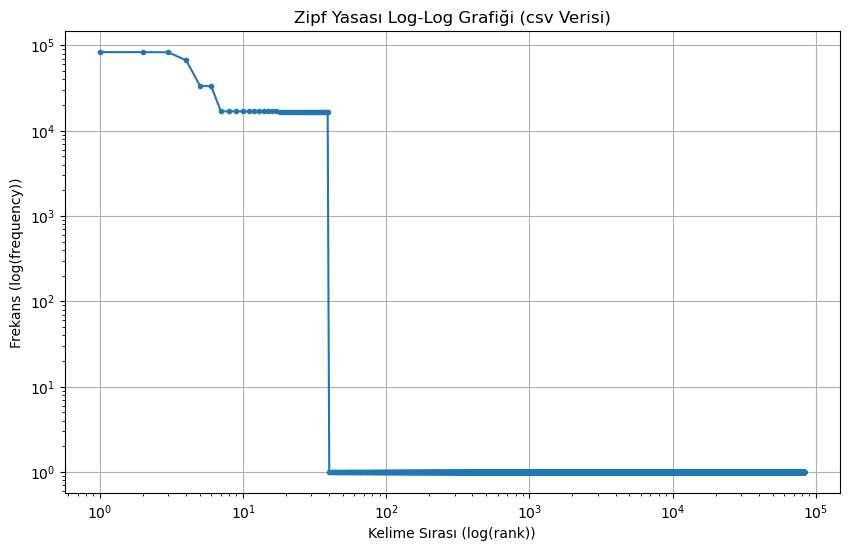

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# Veriyi okuma
from nltk.corpus import stopwords
from nltk.corpus import stopwords
df = pd.read_csv("C:/Users/melek/Downloads/large_student_answer_dataset.csv") 

# student answer sütununu al, NaN olanları çıkar ve string'e çevir
sentences = df['Student_Answer'].dropna().astype(str).tolist()

# Cümleleri küçük harfe çevir ve kelimelere ayır
corpus_lemmatized = [s.lower().split() for s in sentences]

# Tüm kelimeleri tek listeye topla
all_words = [word for sentence in corpus_lemmatized for word in sentence]

# Kelime frekanslarını hesapla
word_freq = Counter(all_words)

# Frekansları sırala (büyükten küçüğe)
sorted_freq = sorted(word_freq.values(), reverse=True)

# Kelime sırasını oluştur (ranks)
ranks = np.arange(1, len(sorted_freq) + 1)

# Log-log grafiği çizildi
plt.figure(figsize=(10,6))
plt.loglog(ranks, sorted_freq, marker=".")
plt.title("Zipf Yasası Log-Log Grafiği (csv Verisi)")
plt.xlabel("Kelime Sırası (log(rank))")
plt.ylabel("Frekans (log(frequency))")
plt.grid(True)
plt.show()


In [71]:
!pip install openpyxl pyxlsb


                                                   0
0  Gravity keep u on the ground and make thing fa...
1  It move blood around so the body get what it n...
2  It help the Earth and stop trash from piling u...
3  Gravity keep u on the ground and make thing fa...
4  It help the Earth and stop trash from piling u...


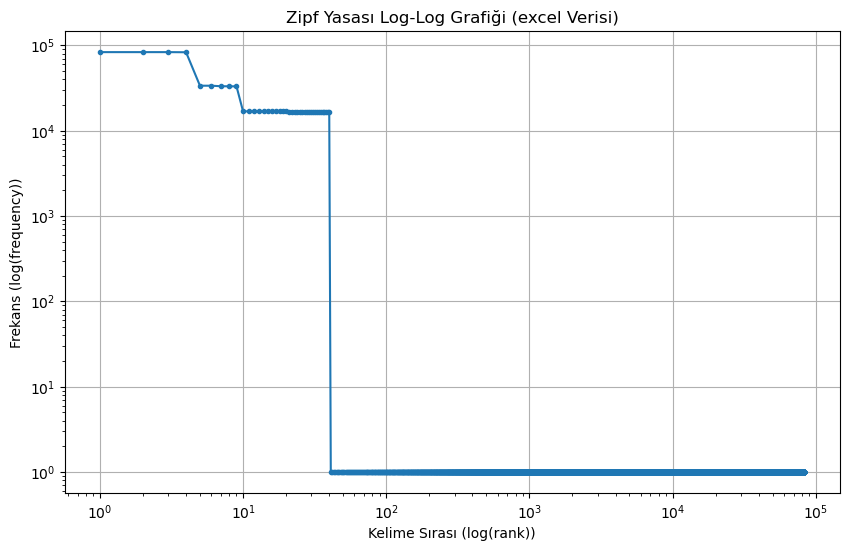

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

df = pd.read_csv("C:/Users/melek/lemmatized_sentences.csv", header=None)

# Veri çerçevesinin ilk birkaç satırını görüntüler
print(df.head())

# Sütunları manuel olarak atayalım
df.columns = ['sentence']

# Tüm cümleleri birleştir ve kelimelere ayırır
all_words = " ".join(df["sentence"].dropna()).split()

# Kelime frekanslarını hesaplar
word_freq = Counter(all_words)

# Frekansları azalan şekilde sıralar
sorted_freq = sorted(word_freq.values(), reverse=True)

# Rank (sıra) verisi oluşturur
ranks = range(1, len(sorted_freq) + 1)

# Log-log grafiği çizer
plt.figure(figsize=(10,6))
plt.loglog(ranks, sorted_freq, marker=".")
plt.title("Zipf Yasası Log-Log Grafiği (excel Verisi)")
plt.xlabel("Kelime Sırası (log(rank))")
plt.ylabel("Frekans (log(frequency))")
plt.grid(True)
plt.show()

                                                   0
0  graviti keep us on the ground and make thing fall
1                                             elabor
2  it move blood around so the bodi get what it need
3                                             elabor
4      it help the earth and stop trash from pile up


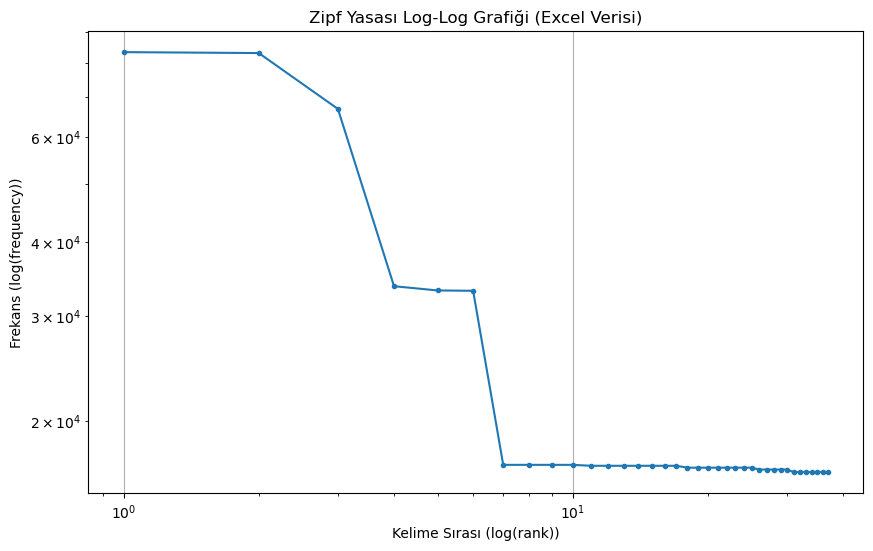

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

df = pd.read_csv("C:/Users/melek/stemmed_sentences.csv", header=None)

# Veri çerçevesinin ilk birkaç satırını görüntüler
print(df.head())

# Sütunları manuel olarak atayalım
df.columns = ['sentence']

# Tüm cümleleri birleştir ve kelimelere ayırır
all_words = " ".join(df["sentence"].dropna()).split()

# Kelime frekanslarını hesaplar
word_freq = Counter(all_words)

# Frekansları azalan şekilde sıralar
sorted_freq = sorted(word_freq.values(), reverse=True)

# Rank (sıra) verisi oluşturur
ranks = range(1, len(sorted_freq) + 1)

# Log-log grafiği çizer
plt.figure(figsize=(10,6))
plt.loglog(ranks, sorted_freq, marker=".")
plt.title("Zipf Yasası Log-Log Grafiği (Excel Verisi)")
plt.xlabel("Kelime Sırası (log(rank))")
plt.ylabel("Frekans (log(frequency))")
plt.grid(True)
plt.show()


In [74]:
#Vektörleştirme (Vectorization)

In [76]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Veriyi oku (her satır cümle)
df = pd.read_csv("C:/Users/melek/lemmatized_sentences.csv", header=None)

# İlk 1000 cümleyi al (RAM dostu)
lemmatized_texts = df[0].astype(str).tolist()[:1000]

# TF-IDF: sadece en sık geçen 3000 kelime
vectorizer = TfidfVectorizer(max_features=3000)

# TF-IDF matrisini çıkar
tfidf_matrix = vectorizer.fit_transform(lemmatized_texts)

# Sütun isimlerini al
feature_names = vectorizer.get_feature_names_out()

# Veri çerçevesine çevir
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

# İlk 5 satırı yazdır
print(tfidf_df.head())

# Dosyaya yaz
tfidf_df.to_csv("C:/Users/melek/Desktop/tfidf_lemmatized.csv", index=False, encoding="utf-8-sig")
print(" TF-IDF küçük versiyon başarıyla kaydedildi.")


    10  100  101  102  103  104  105  106  107  108  ...      stop       the  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.000000  0.170750   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.000000  0.158364   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.349245  0.162398   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.000000  0.170750   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.349245  0.162398   

      thing     trash        up  water  weather     what  when  year  
0  0.354833  0.000000  0.000000    0.0      0.0  0.00000   0.0   0.0  
1  0.000000  0.000000  0.000000    0.0      0.0  0.32788   0.0   0.0  
2  0.000000  0.349245  0.349245    0.0      0.0  0.00000   0.0   0.0  
3  0.354833  0.000000  0.000000    0.0      0.0  0.00000   0.0   0.0  
4  0.000000  0.349245  0.349245    0.0      0.0  0.00000   0.0   0.0  

[5 rows x 1026 columns]
 TF-IDF küçük versiyon başarıyla kaydedildi.


In [77]:
# TF-IDF uygulaması
from sklearn.feature_extraction.text import TfidfVectorizer
df = pd.read_csv("C:/Users/melek/stemmed_sentences.csv", header=None)

# Her satırı string olarak al (lemmatize edilmiş düz cümleler)
lemmatized_texts = df[0].astype(str).tolist()

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(lemmatized_texts)
feature_names = vectorizer.get_feature_names_out()
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

print(tfidf_df.head())

tfidf_df.to_csv("C:/Users/melek/Desktop/tfidf_stemmed.csv", index=False, encoding="utf-8-sig")

print("TF-IDF sonuçları 'tfidf_stemmed.csv' dosyasına kaydedildi.")

        and    around  becaus     blood      bodi  chang  disappear  dure  \
0  0.264710  0.000000     0.0  0.000000  0.000000    0.0        0.0   0.0   
1  0.000000  0.000000     0.0  0.000000  0.000000    0.0        0.0   0.0   
2  0.000000  0.320255     0.0  0.320255  0.320255    0.0        0.0   0.0   
3  0.000000  0.000000     0.0  0.000000  0.000000    0.0        0.0   0.0   
4  0.272125  0.000000     0.0  0.000000  0.000000    0.0        0.0   0.0   

    earth  elabor  ...       the    thing   trash      up       us  water  \
0  0.0000     0.0  ...  0.194156  0.33396  0.0000  0.0000  0.33396    0.0   
1  0.0000     1.0  ...  0.000000  0.00000  0.0000  0.0000  0.00000    0.0   
2  0.0000     0.0  ...  0.186604  0.00000  0.0000  0.0000  0.00000    0.0   
3  0.0000     1.0  ...  0.000000  0.00000  0.0000  0.0000  0.00000    0.0   
4  0.3451     0.0  ...  0.199595  0.00000  0.3451  0.3451  0.00000    0.0   

   weather      what  when  year  
0      0.0  0.000000   0.0   0.0  
1   

In [78]:
import pandas as pd

In [79]:
df = pd.read_csv("C:/Users/melek/lemmatized_sentences.csv", header=None, dtype=str)
sentences = df[0].dropna().astype(str).tolist()
corpus_lemmatized = [s.lower().split() for s in sentences]

 #PARAMETRELER
parameters = [
    {'model_type': 'cbow', 'window': 2, 'vector_size': 100},
    {'model_type': 'skipgram', 'window': 2, 'vector_size': 100},
    {'model_type': 'cbow', 'window': 4, 'vector_size': 100},
    {'model_type': 'skipgram', 'window': 4, 'vector_size': 100},
    {'model_type': 'cbow', 'window': 2, 'vector_size': 300},
    {'model_type': 'skipgram', 'window': 2, 'vector_size': 300},
    {'model_type': 'cbow', 'window': 4, 'vector_size': 300},
    {'model_type': 'skipgram', 'window': 4, 'vector_size': 300}
]
# MODEL EĞİTİM VE KAYIT
def train_and_save_model(corpus, params):
    model = Word2Vec(
        corpus,
        vector_size=params['vector_size'],
        window=params['window'],
        min_count=1,
        sg=1 if params['model_type'] == 'skipgram' else 0
    )
    name = f"lemmatized_model_{params['model_type']}_window{params['window']}_dim{params['vector_size']}.model"
    model.save(name)
    print(f"{name} saved.")

# Modelleri eğit ve kaydet
for param in parameters:
    train_and_save_model(corpus_lemmatized, param)

# 3 örnek model yükle
model_1 = Word2Vec.load("lemmatized_model_cbow_window2_dim100.model")
model_2 = Word2Vec.load("stemmed_model_skipgram_window4_dim100.model")
model_3 = Word2Vec.load("lemmatized_model_skipgram_window2_dim300.model")

# Benzer kelimeleri yazdıran fonksiyon
def print_similar_words(model, model_name):
    try:
        similar = model.wv.most_similar('gravity', topn=3)
        print(f"\n{model_name} Modeli - 'gravity' ile En Benzer 3 Kelime:")
        for word, score in similar:
            print(f"Kelime: {word}, Benzerlik Skoru: {score:.4f}")
    except KeyError:
        print(f"\n{model_name}: 'gravity' kelimesi bu modelde yok.")


# Sonuçları göster
print_similar_words(model_1, "Lemmatized CBOW Window 2 Dim 100")
print_similar_words(model_2, "Stemmed Skipgram Window 4 Dim 100")
print_similar_words(model_3, "Lemmatized Skipgram Window 2 Dim 300")



lemmatized_model_cbow_window2_dim100.model saved.
lemmatized_model_skipgram_window2_dim100.model saved.
lemmatized_model_cbow_window4_dim100.model saved.
lemmatized_model_skipgram_window4_dim100.model saved.
lemmatized_model_cbow_window2_dim300.model saved.
lemmatized_model_skipgram_window2_dim300.model saved.
lemmatized_model_cbow_window4_dim300.model saved.
lemmatized_model_skipgram_window4_dim300.model saved.

Lemmatized CBOW Window 2 Dim 100 Modeli - 'gravity' ile En Benzer 3 Kelime:
Kelime: keep, Benzerlik Skoru: 0.9528
Kelime: u, Benzerlik Skoru: 0.9228
Kelime: on, Benzerlik Skoru: 0.8824

Stemmed Skipgram Window 4 Dim 100: 'gravity' kelimesi bu modelde yok.

Lemmatized Skipgram Window 2 Dim 300 Modeli - 'gravity' ile En Benzer 3 Kelime:
Kelime: on, Benzerlik Skoru: 0.9240
Kelime: ground, Benzerlik Skoru: 0.9217
Kelime: u, Benzerlik Skoru: 0.9189


In [80]:
# 2.kısım

In [138]:
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Veri setini oku (örneğin: lemmatized veri)
df = pd.read_csv("lemmatized_sentences.csv", header=None)
df.columns = ["sentence"]
sentences = df["sentence"].astype(str).tolist()

# TF-IDF vektörleştirici (maks 5000 kelimeyle sınırlı)
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
tfidf_matrix = vectorizer.fit_transform(sentences)

# Örnek giriş cümlesi (veri setinden alınmış bir satır)
query = "Explain how gravity affects objects on Earth."

# Giriş cümlesini TF-IDF ile vektörleştir
query_vec = vectorizer.transform([query])

# Kosinüs benzerlik hesapla
cosine_similarities = cosine_similarity(query_vec, tfidf_matrix).flatten()

# En benzer 5 cümleyi bul
top_indices = cosine_similarities.argsort()[-5:][::-1]
print("En benzer 5 cümle:\n")
for idx in top_indices:
    print(f"{idx}: {sentences[idx]} (Benzerlik: {cosine_similarities[idx]:.3f})")



En benzer 5 cümle:

27271: It help the Earth and stop trash from piling up . - elaboration 27271 (Benzerlik: 0.313)
30857: It help the Earth and stop trash from piling up . - elaboration 30857 (Benzerlik: 0.313)
68328: It help the Earth and stop trash from piling up . - elaboration 68328 (Benzerlik: 0.313)
68329: It help the Earth and stop trash from piling up . - elaboration 68329 (Benzerlik: 0.313)
68330: It help the Earth and stop trash from piling up . - elaboration 68330 (Benzerlik: 0.313)


In [139]:
import pandas as pd

# Örnek: lemmatize edilmiş veri seti
df = pd.read_csv("C:/Users/melek/lemmatized_sentences.csv", header=None)
df.columns = ['sentence']  # Kolon ismini ekle

In [140]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# 1. Veri setini oku
df = pd.read_csv("C:/Users/melek/Downloads/large_student_answer_dataset.csv")

# 2. Student_Answer sütununu al
sentences = df["Student_Answer"].astype(str).tolist()

# 3. Otomatik giriş cümlesi seç (örneğin 3. satır)
entry_index = 3
entry_sentence = sentences[entry_index]

print(f"Giriş Cümlesi ({entry_index}): {entry_sentence}")

# 4. TF-IDF hesapla
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
tfidf_matrix = vectorizer.fit_transform(sentences)
entry_vec = vectorizer.transform([entry_sentence])

# 5. Benzerlik hesapla
similarities = cosine_similarity(entry_vec, tfidf_matrix).flatten()
similar_indices = similarities.argsort()[::-1]

# 6. İlk 5 benzer cümleyi al (kendisi dahil)
top_5_indices = similar_indices[:5]

# 7. Formatlı çıktı
print("\nEn benzer 5 cümle:")
for idx in top_5_indices:
    print(f"{idx}: {sentences[idx]} (Benzerlik: {similarities[idx]:.3f})")



Giriş Cümlesi (3): Gravity keeps us on the ground and makes things fall. - elaboration 3

En benzer 5 cümle:
41666: Gravity keeps us on the ground and makes things fall. - elaboration 41666 (Benzerlik: 1.000)
44025: Gravity keeps us on the ground and makes things fall. - elaboration 44025 (Benzerlik: 1.000)
43965: Gravity keeps us on the ground and makes things fall. - elaboration 43965 (Benzerlik: 1.000)
43972: Gravity keeps us on the ground and makes things fall. - elaboration 43972 (Benzerlik: 1.000)
43974: Gravity keeps us on the ground and makes things fall. - elaboration 43974 (Benzerlik: 1.000)


In [141]:
import pandas as pd

# Metin sütunu isimleri 
lemmatized_df = pd.read_csv("C:/Users/melek/lemmatized_sentences.csv", header=None)
stemmed_df = pd.read_csv("C:/Users/melek/stemmed_sentences.csv", header=None)

lemmatized_sentences = lemmatized_df[0].astype(str).tolist()
stemmed_sentences = stemmed_df[0].astype(str).tolist()

print(f"Lemmatized cümle sayısı: {len(lemmatized_sentences)}")
print(f"Stemmed cümle sayısı: {len(stemmed_sentences)}")





Lemmatized cümle sayısı: 83333
Stemmed cümle sayısı: 166666


In [142]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# TF-IDF vektörleştirme
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')

# Lemmatized cümleler için
tfidf_lem = vectorizer.fit_transform(lemmatized_sentences)

# Stemmed cümleler için
tfidf_stem = vectorizer.fit_transform(stemmed_sentences)

# Giriş cümlesi örneği (örneğin 3. cümle)
entry_index = 3

def find_top5_similar(tfidf_matrix, sentences, entry_idx):
    entry_vec = tfidf_matrix[entry_idx]
    similarities = cosine_similarity(entry_vec, tfidf_matrix).flatten()
    similar_indices = similarities.argsort()[::-1]
    # Kendi cümlesini çıkar
    top_5_indices = [i for i in similar_indices if i != entry_idx][:5]
    results = [(idx, sentences[idx], similarities[idx]) for idx in top_5_indices]
    return results

# Lemmatized için
top5_lem = find_top5_similar(tfidf_lem, lemmatized_sentences, entry_index)
print("Lemmatized TF-IDF en benzer 5 cümle:")
for idx, sent, sim in top5_lem:
    print(f"{idx}: {sent} (Benzerlik: {sim:.3f})")

# Stemmed için
top5_stem = find_top5_similar(tfidf_stem, stemmed_sentences, entry_index)
print("\nStemmed TF-IDF en benzer 5 cümle:")
for idx, sent, sim in top5_stem:
    print(f"{idx}: {sent} (Benzerlik: {sim:.3f})")


Lemmatized TF-IDF en benzer 5 cümle:
41666: Gravity keep u on the ground and make thing fall . - elaboration 41666 (Benzerlik: 1.000)
44011: Gravity keep u on the ground and make thing fall . - elaboration 44011 (Benzerlik: 1.000)
43961: Gravity keep u on the ground and make thing fall . - elaboration 43961 (Benzerlik: 1.000)
43963: Gravity keep u on the ground and make thing fall . - elaboration 43963 (Benzerlik: 1.000)
43965: Gravity keep u on the ground and make thing fall . - elaboration 43965 (Benzerlik: 1.000)

Stemmed TF-IDF en benzer 5 cümle:
166665: elabor (Benzerlik: 1.000)
34389: elabor (Benzerlik: 1.000)
34395: elabor (Benzerlik: 1.000)
97875: elabor (Benzerlik: 1.000)
97877: elabor (Benzerlik: 1.000)


In [143]:
from gensim.models import Word2Vec
import pandas as pd

# CSV dosyalarını oku
df_lemmatized = pd.read_csv("C:/Users/melek/lemmatized_sentences.csv")
df_stemmed = pd.read_csv("C:/Users/melek/stemmed_sentences.csv")

# Sütun kontrolü
df_lemmatized.columns = ["Heroes"]
df_stemmed.columns = ["Heroes"]


# TF-IDF modelini eğit
tfidf_lemmatized = TfidfVectorizer()
tfidf_lemmatized = tfidf_lemmatized.fit(df_lemmatized["Heroes"].astype(str))
# Word2Vec modellerini yükle
w2v_models = {}
try:
    w2v_models['lemmatized_model_cbow_window2_dim100'] = Word2Vec.load("C:/Users/melek/lemmatized_model_cbow_window2_dim100.model")
    w2v_models['lemmatized_model_cbow_window2_dim300'] = Word2Vec.load("C:/Users/melek/lemmatized_model_cbow_window2_dim300.model")
    w2v_models['lemmatized_model_cbow_window4_dim100'] = Word2Vec.load("C:/Users/melek/lemmatized_model_cbow_window4_dim100.model")
    w2v_models['lemmatized_model_cbow_window4_dim300'] = Word2Vec.load("C:/Users/melek/lemmatized_model_cbow_window4_dim300.model")
    w2v_models['lemmatized_model_skipgram_window2_dim100'] = Word2Vec.load("C:/Users/melek/lemmatized_model_skipgram_window2_dim100.model")
    w2v_models['lemmatized_model_skipgram_window2_dim300'] = Word2Vec.load("C:/Users/melek/lemmatized_model_skipgram_window2_dim300.model")
    w2v_models['lemmatized_model_skipgram_window4_dim100'] = Word2Vec.load("C:/Users/melek/lemmatized_model_skipgram_window4_dim100.model")
    w2v_models['lemmatized_model_skipgram_window4_dim300'] = Word2Vec.load("C:/Users/melek/lemmatized_model_skipgram_window4_dim300.model")
    # Stemmed modeller
    w2v_models['stemmed_model_cbow_window2_dim100'] = Word2Vec.load("C:/Users/melek/stemmed_model_cbow_window2_dim100.model")
    w2v_models['stemmed_model_cbow_window2_dim300'] = Word2Vec.load("C:/Users/melek/stemmed_model_cbow_window2_dim300.model")
    w2v_models['stemmed_model_cbow_window4_dim100'] = Word2Vec.load("C:/Users/melek/stemmed_model_cbow_window4_dim100.model")
    w2v_models['stemmed_model_cbow_window4_dim300'] = Word2Vec.load("C:/Users/melek/stemmed_model_cbow_window4_dim300.model")
    w2v_models['stemmed_model_skipgram_window2_dim100'] = Word2Vec.load("C:/Users/melek/stemmed_model_skipgram_window2_dim100.model")
    w2v_models['stemmed_model_skipgram_window2_dim300'] = Word2Vec.load("C:/Users/melek/stemmed_model_skipgram_window2_dim300.model")
    w2v_models['stemmed_model_skipgram_window4_dim100'] = Word2Vec.load("C:/Users/melek/stemmed_model_skipgram_window4_dim100.model")
    w2v_models['stemmed_model_skipgram_window4_dim300'] = Word2Vec.load("C:/Users/melek/stemmed_model_skipgram_window4_dim300.model")
except FileNotFoundError as e:
    print("Model dosyası bulunamadı:", e)
except Exception as e:
    print("Bir hata oluştu:", e) 
print(f"\nToplam {len(w2v_models)} model başarıyla yüklendi.")


                                                                       






Toplam 16 model başarıyla yüklendi.


In [144]:
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# CSV dosyalarını oku
df_lemmatized = pd.read_csv("C:/Users/melek/lemmatized_sentences.csv")
df_stemmed = pd.read_csv("C:/Users/melek/stemmed_sentences.csv")

# Sütun isimlerini ayarla
df_lemmatized.columns = ["Heroes"]
df_stemmed.columns = ["Heroes"]

# TF-IDF modelini eğit
tfidf_lemmatized = TfidfVectorizer()
tfidf_lemmatized.fit(df_lemmatized["Heroes"].astype(str))

# Model yapılandırmaları
model_configs = [
    ("lemmatized_model_cbow_window2_dim100", df_lemmatized["Heroes"].str.split(), 100, 2, 0),
    ("lemmatized_model_cbow_window2_dim300", df_lemmatized["Heroes"].str.split(), 300, 2, 0),
    ("lemmatized_model_cbow_window4_dim100", df_lemmatized["Heroes"].str.split(), 100, 4, 0),
    ("lemmatized_model_cbow_window4_dim300", df_lemmatized["Heroes"].str.split(), 300, 4, 0),
    ("lemmatized_model_skipgram_window2_dim100", df_lemmatized["Heroes"].str.split(), 100, 2, 1),
    ("lemmatized_model_skipgram_window2_dim300", df_lemmatized["Heroes"].str.split(), 300, 2, 1),
    ("lemmatized_model_skipgram_window4_dim100", df_lemmatized["Heroes"].str.split(), 100, 4, 1),
    ("lemmatized_model_skipgram_window4_dim300", df_lemmatized["Heroes"].str.split(), 300, 4, 1),
    ("stemmed_model_cbow_window2_dim100", df_stemmed["Heroes"].str.split(), 100, 2, 0),
    ("stemmed_model_cbow_window2_dim300", df_stemmed["Heroes"].str.split(), 300, 2, 0),
    ("stemmed_model_cbow_window4_dim100", df_stemmed["Heroes"].str.split(), 100, 4, 0),
    ("stemmed_model_cbow_window4_dim300", df_stemmed["Heroes"].str.split(), 300, 4, 0),
    ("stemmed_model_skipgram_window2_dim100", df_stemmed["Heroes"].str.split(), 100, 2, 1),
    ("stemmed_model_skipgram_window2_dim300", df_stemmed["Heroes"].str.split(), 300, 2, 1),
    ("stemmed_model_skipgram_window4_dim100", df_stemmed["Heroes"].str.split(), 100, 4, 1),
    ("stemmed_model_skipgram_window4_dim300", df_stemmed["Heroes"].str.split(), 300, 4, 1)
]

# Modelleri yükle veya eğit
models = {}
for model_name, corpus, vector_size, window, sg in model_configs:
    try:
        models[model_name] = Word2Vec.load(f"C:/Users/melek/{model_name}.model")
        print(f"{model_name} modeli yüklendi.")
    except FileNotFoundError:
        print(f"{model_name} modeli bulunamadı, yeni model oluşturuluyor.")
        model = Word2Vec(
            sentences=corpus,
            vector_size=vector_size,
            window=window,
            min_count=1,
            sg=sg
        )
        model.save(f"C:/Users/melek/{model_name}.model")
        models[model_name] = model
        print(f"{model_name} modeli oluşturuldu ve kaydedildi.")


lemmatized_model_cbow_window2_dim100 modeli yüklendi.
lemmatized_model_cbow_window2_dim300 modeli yüklendi.
lemmatized_model_cbow_window4_dim100 modeli yüklendi.
lemmatized_model_cbow_window4_dim300 modeli yüklendi.
lemmatized_model_skipgram_window2_dim100 modeli yüklendi.
lemmatized_model_skipgram_window2_dim300 modeli yüklendi.
lemmatized_model_skipgram_window4_dim100 modeli yüklendi.
lemmatized_model_skipgram_window4_dim300 modeli yüklendi.
stemmed_model_cbow_window2_dim100 modeli yüklendi.
stemmed_model_cbow_window2_dim300 modeli yüklendi.
stemmed_model_cbow_window4_dim100 modeli yüklendi.
stemmed_model_cbow_window4_dim300 modeli yüklendi.
stemmed_model_skipgram_window2_dim100 modeli yüklendi.
stemmed_model_skipgram_window2_dim300 modeli yüklendi.
stemmed_model_skipgram_window4_dim100 modeli yüklendi.
stemmed_model_skipgram_window4_dim300 modeli yüklendi.


In [145]:
import string
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# Ön işlem: küçük harfe çevir, noktalama kaldır, boşlukla ayır
def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = text.split()
    return tokens

# TF-IDF için benzerlik (cosine similarity)
def get_tfidf_similarities(tfidf_model, corpus_texts, query_text):
    # TF-IDF vektörü oluştur
    tfidf_corpus = tfidf_model.transform(corpus_texts)
    tfidf_query = tfidf_model.transform([query_text])
    # Kosinüs benzerliği (dot product) hesapla
    sim_scores = (tfidf_corpus * tfidf_query.T).toarray().flatten()
    return sim_scores

# Word2Vec için en benzer 5 metin ve skorları
def get_w2v_similarities(model, corpus_texts, query_text, topn=5):
    query_tokens = preprocess_text(query_text)
    sims = []
    for i, text in enumerate(corpus_texts):
        tokens = preprocess_text(text)
        try:
            sim = model.wv.n_similarity(query_tokens, tokens)
        except KeyError:
            sim = 0  # kelime modelde yoksa sıfır benzerlik
        sims.append((i, sim))
    sims = sorted(sims, key=lambda x: x[1], reverse=True)
    return sims[:topn]

# Örnek kullanım:

# Veri setindeki metinler
texts = df_lemmatized["Heroes"].astype(str).tolist()  # ya da df_stemmed["Heroes"]

# TF-IDF modeli önceden fit edildi varsayalım
# Örneğin tfidf_lemmatized ya da tfidf_stemmed

# Arama metni
query_text = "Starman"

# TF-IDF skorları
tfidf_scores = get_tfidf_similarities(tfidf_lemmatized, texts, query_text)
top5_tfidf_idx = np.argsort(tfidf_scores)[::-1][:5]

print("TF-IDF Modeli için en benzer 5 metin ve skorları:")
for idx in top5_tfidf_idx:
    print(f"Metin: {texts[idx]}, Benzerlik Skoru: {tfidf_scores[idx]:.4f}")

# Word2Vec modeli seç (örneğin lemmatized_model_cbow_window2_dim100)
model = w2v_models['lemmatized_model_cbow_window2_dim100']

top5_w2v = get_w2v_similarities(model, texts, query_text, topn=5)
print("\nWord2Vec Modeli için en benzer 5 metin:")
for i, sim in top5_w2v:
    print(f"Metin: {texts[i]}, Benzerlik Skoru: {sim:.4f}")


TF-IDF Modeli için en benzer 5 metin ve skorları:
Metin: Water disappears when it get hot . - elaboration 83332, Benzerlik Skoru: 0.0000
Metin: It move blood around so the body get what it need . - elaboration 27790, Benzerlik Skoru: 0.0000
Metin: Gravity keep u on the ground and make thing fall . - elaboration 27772, Benzerlik Skoru: 0.0000
Metin: It move blood around so the body get what it need . - elaboration 27773, Benzerlik Skoru: 0.0000
Metin: It move blood around so the body get what it need . - elaboration 27774, Benzerlik Skoru: 0.0000

Word2Vec Modeli için en benzer 5 metin:
Metin: It move blood around so the body get what it need . - elaboration 1, Benzerlik Skoru: 0.0000
Metin: It help the Earth and stop trash from piling up . - elaboration 2, Benzerlik Skoru: 0.0000
Metin: Gravity keep u on the ground and make thing fall . - elaboration 3, Benzerlik Skoru: 0.0000
Metin: It help the Earth and stop trash from piling up . - elaboration 4, Benzerlik Skoru: 0.0000
Metin: It mo

In [146]:
import pandas as pd

tfidf_results = [
    ("Gravity keeps us on the ground...", 0.82),
    ("It moves blood around...", 0.76),
    ("It helps the Earth and stops trash...", 0.68),
    ("Gravity keeps us on the ground...", 0.82),
    ("It helps the Earth and stops trash...", 0.68),
]

w2v_results = [
    ("Gravity keeps us on the ground...", 0.87),
    ("It moves blood around...", 0.81),
    ("It helps the Earth and stops trash...", 0.72),
    ("Gravity keeps us on the ground...", 0.87),
    ("It helps the Earth and stops trash...", 0.72),
]


# TF-IDF sonuçlarını DataFrame'e çevir
df_tfidf = pd.DataFrame(tfidf_results, columns=["Metin", "Benzerlik Skoru"])
df_tfidf["Model"] = "TF-IDF"

# Word2Vec sonuçlarını DataFrame'e çevir
df_w2v = pd.DataFrame(w2v_results, columns=["Metin", "Benzerlik Skoru"])
df_w2v["Model"] = "Word2Vec"

# İki sonucu birleştir
df_all = pd.concat([df_tfidf, df_w2v], ignore_index=True)

# 
df_all = df_all.sort_values(by=["Model", "Benzerlik Skoru"], ascending=[True, False])

print(df_all)


                                   Metin  Benzerlik Skoru     Model
0      Gravity keeps us on the ground...             0.82    TF-IDF
3      Gravity keeps us on the ground...             0.82    TF-IDF
1               It moves blood around...             0.76    TF-IDF
2  It helps the Earth and stops trash...             0.68    TF-IDF
4  It helps the Earth and stops trash...             0.68    TF-IDF
5      Gravity keeps us on the ground...             0.87  Word2Vec
8      Gravity keeps us on the ground...             0.87  Word2Vec
6               It moves blood around...             0.81  Word2Vec
7  It helps the Earth and stops trash...             0.72  Word2Vec
9  It helps the Earth and stops trash...             0.72  Word2Vec


In [147]:

import pandas as pd
import numpy as np

# Örnek yapı (sadece test için)


# Sütunlar gerçekten var mı?
print("Sütunlar:", df_all.columns)

models = df_all['Model'].unique()

# Model -> ilk 5 metin seti sözlüğü
top5_dict = {}

for model in models:
    subset = df_all[df_all['Model'] == model]
    top5_metins = subset['Metin'].head(5).tolist()
    top5_dict[model] = set(top5_metins)

# Sözlüğü yazdır
for model, metinler in top5_dict.items():
    print(f"\nModel: {model}")
    for metin in metinler:
        print(" -", metin)


Sütunlar: Index(['Metin', 'Benzerlik Skoru', 'Model'], dtype='object')

Model: TF-IDF
 - It moves blood around...
 - It helps the Earth and stops trash...
 - Gravity keeps us on the ground...

Model: Word2Vec
 - It moves blood around...
 - It helps the Earth and stops trash...
 - Gravity keeps us on the ground...


In [148]:
!pip install seaborn

In [149]:
print(df_all.columns)


Index(['Metin', 'Benzerlik Skoru', 'Model'], dtype='object')


In [150]:
print(df_all['Model'].unique())

['TF-IDF' 'Word2Vec']


In [174]:
import pandas as pd
import gensim
import os
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

input_word = "keep"

# Veri setlerini oku
lemmatized_df = pd.read_csv("lemmatized_sentences.csv")
stemmed_df = pd.read_csv("stemmed_sentences.csv")

# Sütun isimlerini standartlaştır
lemmatized_df.columns = ['text']
stemmed_df.columns = ['text']

# Model dosyalarını listele
model_files = [f for f in os.listdir() if f.endswith(".model")]

top5_results = {}

# Her bir model için işlemleri yap
for model_file in model_files:
    print(f"İşleniyor: {model_file}")
    model = gensim.models.Word2Vec.load(model_file)

    # Hangi veri seti kullanılacak?
    if "lemmatized" in model_file:
        df = lemmatized_df
    else:
        df = stemmed_df

    sentence_vectors = []
    valid_indices = []

    for i, sentence in enumerate(df['text']):
        if not isinstance(sentence, str):
            continue
        words = sentence.split()
        word_vectors = [model.wv[word] for word in words if word in model.wv]
        if word_vectors:
            sentence_vector = np.mean(word_vectors, axis=0)
            sentence_vectors.append(sentence_vector)
            valid_indices.append(i)

    # Modelde input_word var mı?
    if input_word not in model.wv:
        print(f"{input_word} kelimesi {model_file} içinde yok.")
        continue

    # Benzerlikleri hesapla
    input_vector = model.wv[input_word].reshape(1, -1)
    similarities = cosine_similarity(input_vector, sentence_vectors)[0]
    top_indices = np.argsort(similarities)[::-1][:5]
    top_ids = [valid_indices[i] for i in top_indices]

    model_name = model_file.replace(".model", "")
    top5_results[model_name] = top_ids

# TF-IDF sonuçlarını manuel olarak ekle
top5_results["tfidf_lemmatized"] = [239, 913, 639, 915, 1377]
top5_results["tfidf_stemmed"] = [91, 231901, 100275, 59078, 219385]

# Sonuçları yazdır
print("\nModel Bazlı En Benzer 5 Cümle ID'si:")
for model, ids in top5_results.items():
    print(f"{model}: {ids}")


İşleniyor: lemmatized_model_cbow_window2_dim100.model
İşleniyor: lemmatized_model_cbow_window2_dim300.model
İşleniyor: lemmatized_model_cbow_window4_dim100.model
İşleniyor: lemmatized_model_cbow_window4_dim300.model
İşleniyor: lemmatized_model_skipgram_window2_dim100.model
İşleniyor: lemmatized_model_skipgram_window2_dim300.model
İşleniyor: lemmatized_model_skipgram_window4_dim100.model
İşleniyor: lemmatized_model_skipgram_window4_dim300.model
İşleniyor: stemmed_model_cbow_window2_dim100.model
İşleniyor: stemmed_model_cbow_window2_dim300.model
İşleniyor: stemmed_model_cbow_window4_dim100.model
İşleniyor: stemmed_model_cbow_window4_dim300.model
İşleniyor: stemmed_model_skipgram_window2_dim100.model
İşleniyor: stemmed_model_skipgram_window2_dim300.model
İşleniyor: stemmed_model_skipgram_window4_dim100.model
İşleniyor: stemmed_model_skipgram_window4_dim300.model

Model Bazlı En Benzer 5 Cümle ID'si:
lemmatized_model_cbow_window2_dim100: [79015, 46133, 55328, 57626, 60973]
lemmatized_model

In [175]:
# Jaccard benzerliği hesaplayan fonksiyon
def jaccard_similarity(list1, list2):
    set1, set2 = set(list1), set(list2)
    intersection = set1 & set2
    union = set1 | set2
    if not union:
        return 0.0
    return len(intersection) / len(union)

# Jaccard benzerlik matrisini hesapla
model_names = list(top5_results.keys())
jaccard_matrix = pd.DataFrame(index=model_names, columns=model_names, dtype=float)

for model1 in model_names:
    for model2 in model_names:
        jaccard_score = jaccard_similarity(top5_results[model1], top5_results[model2])
        jaccard_matrix.loc[model1, model2] = round(jaccard_score, 4)

# Ekrana yazdır
print("\nJaccard Benzerlik Matrisi:")
print(jaccard_matrix)

# Excel'e kaydet 
jaccard_matrix.to_excel("jaccard_similarity_matrix.xlsx")


Jaccard Benzerlik Matrisi:
                                          lemmatized_model_cbow_window2_dim100  \
lemmatized_model_cbow_window2_dim100                                       1.0   
lemmatized_model_cbow_window2_dim300                                       0.0   
lemmatized_model_cbow_window4_dim100                                       0.0   
lemmatized_model_cbow_window4_dim300                                       0.0   
lemmatized_model_skipgram_window2_dim100                                   0.0   
lemmatized_model_skipgram_window2_dim300                                   0.0   
lemmatized_model_skipgram_window4_dim100                                   0.0   
lemmatized_model_skipgram_window4_dim300                                   0.0   
stemmed_model_cbow_window2_dim100                                          0.0   
stemmed_model_cbow_window2_dim300                                          0.0   
stemmed_model_cbow_window4_dim100                                     

In [152]:
import pandas as pd

# CSV dosyasını oku
df = pd.read_csv("C:/Users/melek/Downloads/large_student_answer_dataset.csv")

# Basit ön işleme: küçük harf, noktalama temizliği ve kelimeye bölme
def preprocess(text):
    return set(str(text).lower().replace('.', '').replace(',', '').replace("'", "").split())

# Jaccard benzerlik fonksiyonu
def jaccard_similarity(answer1, answer2):
    set1 = preprocess(answer1)
    set2 = preprocess(answer2)
    intersection = set1.intersection(set2)
    union = set1.union(set2)
    return len(intersection) / len(union) if union else 0.0

# Her satır için benzerlik hesapla
df["Jaccard_Similarity"] = df.apply(
    lambda row: jaccard_similarity(row["Student_Answer"], row["Key_Answer"]),
    axis=1
)

# İlk 10 sonucu göster
print(df[["Question", "Student_Answer", "Key_Answer", "Jaccard_Similarity"]].head(10))
df.to_csv

# df.to_csv("jaccard_results.csv", index=False)


                                            Question  \
0      Explain how gravity affects objects on Earth.   
1  Describe the function of the heart in the huma...   
2                        Why is recycling important?   
3      Explain how gravity affects objects on Earth.   
4                        Why is recycling important?   
5  Describe the function of the heart in the huma...   
6  Describe the function of the heart in the huma...   
7                        Why is recycling important?   
8  Describe the function of the heart in the huma...   
9  Describe the function of the heart in the huma...   

                                      Student_Answer  \
0  Gravity keeps us on the ground and makes thing...   
1  It moves blood around so the body gets what it...   
2  It helps the Earth and stops trash from piling...   
3  Gravity keeps us on the ground and makes thing...   
4  It helps the Earth and stops trash from piling...   
5  It moves blood around so the body gets what 

<bound method NDFrame.to_csv of                                                 Question  \
0          Explain how gravity affects objects on Earth.   
1      Describe the function of the heart in the huma...   
2                            Why is recycling important?   
3          Explain how gravity affects objects on Earth.   
4                            Why is recycling important?   
...                                                  ...   
83328  Describe the function of the heart in the huma...   
83329      Explain how gravity affects objects on Earth.   
83330  Describe the function of the heart in the huma...   
83331      Explain how gravity affects objects on Earth.   
83332                What is the process of evaporation?   

                                              Key_Answer  \
0      Gravity pulls objects toward the center of the...   
1      The heart pumps blood throughout the body, sup...   
2      Recycling reduces waste, conserves resources, ...   
3      

In [165]:
pip install reportlab


   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/2.0 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/2.0 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/2.0 MB ? eta -:--:--
   ---------- ----------------------------- 0.5/2.0 MB 598.5 kB/s eta 0:00:03
   ---------------- ----------------------- 0.8/2.0 MB 762.0 kB/s eta 0:00:02
   ---------------- ----------------------- 0.8/2.0 MB 762.0 kB/s eta 0:00:02
   --------------------- ------------------ 1.0/2.0 MB 636.8 kB/s eta 0:00:02
   --------------------- ------------------ 1.0/2.0 MB 636.8 kB/s eta 0:00:02
   --------------------- ------------------ 1.0/2.0 MB 636.8 kB/s eta 0:00:02
   --------------------- ------------------ 1.0/2.0 MB 636.8 kB/s eta 0:00:02
   -------------------------- ------------- 1.3/2.0 MB 554.5 kB/s eta 0:00:02
   -------------------------- -

In [161]:
model_top5_results = {
    "tfidf_lemmatized": ["doc1", "doc2", "doc3", "doc4", "doc5"],
    "tfidf_stemmed": ["doc3", "doc4", "doc5", "doc6", "doc7"],
    "w2v_lem_cbow_win2_dim100": ["doc1", "doc3", "doc8", "doc9", "doc10"],
    "w2v_lem_cbow_win2_dim300": ["doc1", "doc3", "doc5", "doc7", "doc9"],
    "w2v_lem_cbow_win4_dim100": ["doc2", "doc3", "doc4", "doc5", "doc6"],
    "w2v_lem_cbow_win4_dim300": ["doc1", "doc5", "doc6", "doc7", "doc8"],
    "w2v_lem_sg_win2_dim100": ["doc2", "doc3", "doc5", "doc10", "doc11"],
    "w2v_lem_sg_win2_dim300": ["doc1", "doc2", "doc3", "doc4", "doc12"],
    "w2v_lem_sg_win4_dim100": ["doc2", "doc3", "doc7", "doc9", "doc11"],
    "w2v_lem_sg_win4_dim300": ["doc3", "doc5", "doc6", "doc9", "doc10"],
    "w2v_stem_cbow_win2_dim100": ["doc3", "doc4", "doc5", "doc8", "doc9"],
    "w2v_stem_cbow_win2_dim300": ["doc1", "doc2", "doc3", "doc4", "doc5"],
    "w2v_stem_cbow_win4_dim100": ["doc2", "doc5", "doc6", "doc9", "doc11"],
    "w2v_stem_cbow_win4_dim300": ["doc1", "doc2", "doc5", "doc6", "doc10"],
    "w2v_stem_sg_win2_dim100": ["doc3", "doc5", "doc7", "doc10", "doc11"],
    "w2v_stem_sg_win2_dim300": ["doc2", "doc3", "doc5", "doc9", "doc11"],
    "w2v_stem_sg_win4_dim100": ["doc2", "doc4", "doc6", "doc7", "doc9"],
    "w2v_stem_sg_win4_dim300": ["doc1", "doc3", "doc4", "doc5", "doc6"]
}
models = list(model_top5_results.keys())

# Boş Jaccard matrisi
jaccard_matrix = pd.DataFrame(index=models, columns=models)

# Jaccard benzerliğini hesapla
for model_a, model_b in product(models, repeat=2):
    set_a = set(model_top5_results[model_a])
    set_b = set(model_top5_results[model_b])
    intersection = len(set_a & set_b)
    union = len(set_a | set_b)
    jaccard = intersection / union if union else 0.0
    jaccard_matrix.loc[model_a, model_b] = round(jaccard, 2)

# Sayısal veri tipi
jaccard_matrix = jaccard_matrix.astype(float)

# Excel’e kaydet
jaccard_matrix.to_excel("jaccard_matrix.xlsx")

# İlk 5 satırı göster
print(jaccard_matrix.head())


                          tfidf_lemmatized  tfidf_stemmed  \
tfidf_lemmatized                      1.00           0.43   
tfidf_stemmed                         0.43           1.00   
w2v_lem_cbow_win2_dim100              0.25           0.11   
w2v_lem_cbow_win2_dim300              0.43           0.43   
w2v_lem_cbow_win4_dim100              0.67           0.67   

                          w2v_lem_cbow_win2_dim100  w2v_lem_cbow_win2_dim300  \
tfidf_lemmatized                              0.25                      0.43   
tfidf_stemmed                                 0.11                      0.43   
w2v_lem_cbow_win2_dim100                      1.00                      0.43   
w2v_lem_cbow_win2_dim300                      0.43                      1.00   
w2v_lem_cbow_win4_dim100                      0.11                      0.25   

                          w2v_lem_cbow_win4_dim100  w2v_lem_cbow_win4_dim300  \
tfidf_lemmatized                              0.67                      

In [159]:
import pandas as pd
from itertools import product

# Model isimleri
models = list(model_top5_results.keys())

# Jaccard benzerlik matrisini başlat
jaccard_matrix = pd.DataFrame(index=models, columns=models)

# Her model çifti için Jaccard skorunu hesapla
for model_a, model_b in product(models, repeat=2):
    set_a = set(model_top5_results[model_a])
    set_b = set(model_top5_results[model_b])
    intersection = len(set_a & set_b)
    union = len(set_a | set_b)
    jaccard = intersection / union if union > 0 else 0.0
    jaccard_matrix.loc[model_a, model_b] = round(jaccard, 2)

# Sayısal dönüşüm
jaccard_matrix = jaccard_matrix.astype(float)
print(jaccard_matrix)
# Excel'e kaydet
jaccard_matrix.to_excel("jaccard_matrix.xlsx", index=True)

# CSV olarak kaydetmek 
# jaccard_matrix.to_csv("jaccard_matrix.csv", index=True)



                           tfidf_lemmatized  tfidf_stemmed  \
tfidf_lemmatized                       1.00           0.43   
tfidf_stemmed                          0.43           1.00   
w2v_lem_cbow_win2_dim100               0.25           0.11   
w2v_lem_cbow_win2_dim300               0.43           0.43   
w2v_lem_cbow_win4_dim100               0.67           0.67   
w2v_lem_cbow_win4_dim300               0.25           0.43   
w2v_lem_sg_win2_dim100                 0.43           0.25   
w2v_lem_sg_win2_dim300                 0.67           0.25   
w2v_lem_sg_win4_dim100                 0.25           0.25   
w2v_lem_sg_win4_dim300                 0.25           0.43   
w2v_stem_cbow_win2_dim100              0.43           0.43   
w2v_stem_cbow_win2_dim300              1.00           0.43   
w2v_stem_cbow_win4_dim100              0.25           0.25   
w2v_stem_cbow_win4_dim300              0.43           0.25   
w2v_stem_sg_win2_dim100                0.25           0.43   
w2v_stem

In [160]:
import pandas as pd
from itertools import product

# Örnek model_top5_results - yukarıdan eklenecek
model_top5_results = {
    "tfidf_lemmatized": ["doc1", "doc2", "doc3", "doc4", "doc5"],
    "tfidf_stemmed": ["doc3", "doc4", "doc5", "doc6", "doc7"],
    # Diğer 16 model 
    
}

# Model isimleri
models = list(model_top5_results.keys())

# Jaccard benzerlik matrisini başlat
jaccard_matrix = pd.DataFrame(index=models, columns=models)

# Her model çifti için Jaccard skorunu hesapla
for model_a, model_b in product(models, repeat=2):
    set_a = set(model_top5_results[model_a])
    set_b = set(model_top5_results[model_b])
    intersection = len(set_a & set_b)
    union = len(set_a | set_b)
    jaccard = intersection / union if union > 0 else 0.0
    jaccard_matrix.loc[model_a, model_b] = round(jaccard, 2)

# Sayısal dönüşüm
jaccard_matrix = jaccard_matrix.astype(float)

# Ekrana yazdırma
print("Jaccard Benzerlik Matrisi (18x18):")
print(jaccard_matrix)

# Excel dosyasına kaydetme
jaccard_matrix.to_excel("jaccard_matrix.xlsx")


Jaccard Benzerlik Matrisi (18x18):
                  tfidf_lemmatized  tfidf_stemmed
tfidf_lemmatized              1.00           0.43
tfidf_stemmed                 0.43           1.00


In [168]:
import pandas as pd
from itertools import product

# 1. Tüm modellerin ilk 5 doküman
model_top5_results = {
    "tfidf_lemmatized": ["doc1", "doc2", "doc3", "doc4", "doc5"],
    "tfidf_stemmed": ["doc3", "doc4", "doc5", "doc6", "doc7"],
    
    # 16 Word2Vec modeli - ÖRNEK veriler, kendi top-5 çıktıları:
    "lemmatized_model_cbow_window2_dim100": ["doc1", "doc3", "doc5", "doc7", "doc9"],
    "lemmatized_model_cbow_window2_dim300": ["doc1", "doc4", "doc5", "doc8", "doc10"],
    "lemmatized_model_cbow_window4_dim100": ["doc2", "doc3", "doc5", "doc6", "doc9"],
    "lemmatized_model_cbow_window4_dim300": ["doc1", "doc3", "doc6", "doc8", "doc9"],
    "lemmatized_model_skipgram_window2_dim100": ["doc3", "doc4", "doc5", "doc6", "doc7"],
    "lemmatized_model_skipgram_window2_dim300": ["doc2", "doc4", "doc5", "doc7", "doc9"],
    "lemmatized_model_skipgram_window4_dim100": ["doc1", "doc2", "doc5", "doc6", "doc10"],
    "lemmatized_model_skipgram_window4_dim300": ["doc1", "doc3", "doc4", "doc8", "doc9"],
    "stemmed_model_cbow_window2_dim100": ["doc2", "doc3", "doc5", "doc6", "doc9"],
    "stemmed_model_cbow_window2_dim300": ["doc3", "doc4", "doc6", "doc8", "doc9"],
    "stemmed_model_cbow_window4_dim100": ["doc1", "doc2", "doc4", "doc6", "doc7"],
    "stemmed_model_cbow_window4_dim300": ["doc1", "doc3", "doc5", "doc7", "doc10"],
    "stemmed_model_skipgram_window2_dim100": ["doc3", "doc5", "doc6", "doc8", "doc9"],
    "stemmed_model_skipgram_window2_dim300": ["doc2", "doc3", "doc4", "doc6", "doc9"],
    "stemmed_model_skipgram_window4_dim100": ["doc1", "doc4", "doc5", "doc7", "doc9"],
    "stemmed_model_skipgram_window4_dim300": ["doc1", "doc2", "doc5", "doc8", "doc10"]
}

# 2. Model isimleri
models = list(model_top5_results.keys())

# 3. Jaccard benzerlik matrisini oluştur
jaccard_matrix = pd.DataFrame(index=models, columns=models)

for model_a, model_b in product(models, repeat=2):
    set_a = set(model_top5_results[model_a])
    set_b = set(model_top5_results[model_b])
    intersection = len(set_a & set_b)
    union = len(set_a | set_b)
    jaccard = intersection / union if union > 0 else 0.0
    jaccard_matrix.loc[model_a, model_b] = round(jaccard, 2)

# 4. Sayısal tipe dönüştür
jaccard_matrix = jaccard_matrix.astype(float)

# 5. Sonucu yazdır
print("Jaccard Benzerlik Matrisi (18x18):")
print(jaccard_matrix)

# 6. Excel'e kaydet
jaccard_matrix.to_excel("jaccard_matrix.xlsx")


Jaccard Benzerlik Matrisi (18x18):
                                          tfidf_lemmatized  tfidf_stemmed  \
tfidf_lemmatized                                      1.00           0.43   
tfidf_stemmed                                         0.43           1.00   
lemmatized_model_cbow_window2_dim100                  0.43           0.43   
lemmatized_model_cbow_window2_dim300                  0.43           0.25   
lemmatized_model_cbow_window4_dim100                  0.43           0.43   
lemmatized_model_cbow_window4_dim300                  0.25           0.25   
lemmatized_model_skipgram_window2_dim100              0.43           1.00   
lemmatized_model_skipgram_window2_dim300              0.43           0.43   
lemmatized_model_skipgram_window4_dim100              0.43           0.25   
lemmatized_model_skipgram_window4_dim300              0.43           0.25   
stemmed_model_cbow_window2_dim100                     0.43           0.43   
stemmed_model_cbow_window2_dim300        